# 2022-2023 Football Stats Introduction

## About the Data

In this project, we will combine two datasets: the first one is [2022-2023 Football Team Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-team-stats) and the second one is [2022-2023 Football Player Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats).
hese two dataset contain stats for players and teams in the 2022-2023 season.

The first dataset contains 2022-2023 football team stats and the second one contains 2022-2023 football player stats. 
the data is limited these top 5 leagues: Premier League, Ligue 1, Bundesliga, Serie A and La Liga.

## Dataset Overview

The datasets focus on a variety of statistics for both teams and players. Below is a brief overview of each dataset's contents.

### Player Stats (`player_stats.csv`)

This file contains detailed performance metrics for players, including:

- **Basic Information**: Player's name, nation, position, squad, league, age, and birth year.
- **Playing Time**: Matches played, starts, minutes played.
- **Offensive Stats**: Goals, shots, shots on target, pass completion rates.
- **Defensive Metrics**: Tackles, interceptions, clearances.
- **Passing**: Total passes attempted/completed, passing distances, types of passes.
- **Advanced Metrics**: Shot-creating actions, goal-creating actions, dribbles, carries.

### FIFA 23 Stats (`fifa_player_stats.csv`)

This dataset provides detailed FIFA 23 stats for players (which is based on the 2022-2023 season). it covers a wide range of attributes:

- **Basic Information**: Known As, Full Name, Age, Nationality, Image Link.
- **Physical Attributes**: Height, Weight.
- **Club and National** Team Details: Club Name, Wage, Release Clause, Contract Details, National Team Information.
- **Player Abilities**: Overall rating, Potential, Position-specific ratings, Skill Moves, Weak Foot Rating.
- **Performance Metrics**: Pace, Shooting, Passing, Dribbling, Defending, Physicality, Goalkeeping skills.


### Team Stats (`team_stats.csv`)

For teams, the dataset includes:

- **Ranking and Results**: Squad rank, wins, draws, losses, goals for/against, points.
- **Expected Goals (xG)**: xG, xGA (expected goals against), xGD (expected goal difference).
- **Attendance**: Average attendance per game (home matches).
- **Key Players**: Top team scorer, most played goalkeeper.

## 1.1: We will first start by loading the data :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
import unicodedata
import shutil
import requests
from bs4 import BeautifulSoup
import os
import time



warnings.filterwarnings('ignore')

# loading the data
playerStatsDf = pd.read_csv('dataset/player_stats.csv', encoding='ISO-8859-1', delimiter=';')
teamStatsDf = pd.read_csv('dataset/team_stats.csv', encoding='ISO-8859-1', delimiter=';')
fifaPlayersDf = pd.read_csv('dataset/fifa_player_stats.csv')


/Users/mohamedcharfi/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
teamStatsDf

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,-36,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy
94,95,Cremonese,ITA,19,30,3,10,17,27,54,-27,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,-32,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero
96,97,Elche,ESP,20,29,2,7,20,20,59,-39,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía


In [4]:
pd.set_option('display.max_seq_items', None)
print(teamStatsDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')


In [5]:
pd.set_option('display.max_seq_items', None)
print(fifaPlayersDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

## 1.2:  We will explore the columns of the dataframes

In [6]:
playerStatsDf.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.00,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.00,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.00,0.0,0.00,6.51,0.31,0.39,44.4
5,6,Oliver Abildgaard,DEN,MF,Hellas Verona,Serie A,26,1996,1,0,...,0.00,0.00,10.00,0.00,0.0,0.00,10.00,0.00,10.00,0.0
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.0,0.00,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.0,0.00,1.67,0.83,3.33,20.0
8,9,Abner,BRA,DF,Betis,La Liga,22,2000,4,3,...,0.00,1.33,2.33,0.00,0.0,0.00,6.00,1.00,2.00,33.3
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.0,0.00,4.43,0.42,1.32,24.1


In [7]:
playerStatsDf.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


In [8]:
# display all the possible columns of Pos
playerStatsDf['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [9]:
pd.set_option('display.max_seq_items', None)
print(playerStatsDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw',
       'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff',
       'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh',
       'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib',
       'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks',
       'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches',
       'TouD

# 1.3 preprocessing the players dataset

In [10]:
acronyms = {"Rk": "Rank", "Player": "Player's name", "Nation": "Player's nation", "Pos": "Position",
            "Squad": "Squad’s name", "Comp": "League that squat occupies", "Age": "Player's age",
            "Born": "Year of birth", "MP": "Matches played", "Starts": "Matches started",
            "Min": "Minutes played", "90s": "Minutes played divided by 90", 
            "Goals": "Goals scored or allowed", 
            "Shots": "Shots total (Does not include penalty kicks)", 
            "SoT": "Shots on target (Does not include penalty kicks)", 
            'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
            'G/Sh': 'Goals per shot', 
            'G/SoT': 'Goals per shot on target (Does not include penalty kicks)', 
            'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
            'ShoFK': 'Shots from free kicks', 
            'ShoPK': 'Penalty kicks made',
            "PasProg":"Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
                  "PasAtt":"Passes attempted",
                  "PasLive":"Live-ball passes",
                  "PasDead":"Dead-ball passes",
                  "PasFK":"Passes attempted from free kicks",
                  "TB":"Completed pass sent between back defenders into open space",
                  "Sw":"Passes that travel more than 40 yards of the width of the pitch",
                  "PasCrs":"Crosses",
                  "TI":"Throw-Ins taken",
                  "CK":"Corner kicks",
                  "CkIn":"Inswinging corner kicks",
                  "CkOut":"Outswinging corner kicks",
                  "CkStr":"Straight corner kicks",
                  "PasCmp":"Passes completed",
                  "PasOff":"Offsides",
                  "PasBlocks":"Blocked by the opponent who was standing it the path",
                  "SCA":"Shot-creating actions",
                  "ScaPassLive":"Completed live-ball passes that lead to a shot attempt",
                  "ScaPassDead":"Completed dead-ball passes that lead to a shot attempt",
                  "ScaDrib":"Successful dribbles that lead to a shot attempt",
                  "ScaSh":"Shots that lead to another shot attempt",
                  "ScaFld":"Fouls drawn that lead to a shot attempt",
                  "ScaDef":"Defensive actions that lead to a shot attempt",
                  "GCA":"Goal-creating actions",
                  "GcaPassLive":"Completed live-ball passes that lead to a goal",
                  "GcaPassDead":"Completed dead-ball passes that lead to a goal",
                  "GcaDrib":"Successful dribbles that lead to a goal",
                  "GcaSh":"Shots that lead to another goal-scoring shot",
                  "GcaFld":"Fouls drawn that lead to a goal",
                  "GcaDef":"Defensive actions that lead to a goal",
                  "Tkl":"Number of players tackled",
                  "TklWon":"Tackles in which the tackler's team won possession of the ball",
                  "TklDef3rd":"Tackles in defensive 1/3",
                  "TklMid3rd":"Tackles in middle 1/3",
                  "TklAtt3rd":"Tackles in attacking 1/3",
                  "TklDri":"Number of dribblers tackled",
                  "TklDriAtt":"Number of times dribbled past plus number of tackles",
                  "TklDri%":"Percentage of dribblers tackled",
                  "TklDriPast":"Number of times dribbled past by an opposing player",
                  "Blocks":'Number of times blocking the ball by standing in its path',
                 'BlkSh':'Number of times blocking a shot by standing in its path',
            'PKatt': 'Penalty kicks attempted', 
            'PasTotCmp': 'Passes completed', 
            'PasTotAtt': 'Passes attempted', 
            'PasTotCmp%': 'Pass completion percentage', 
            'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
            'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
            'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)', 
            'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)', 
            'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
            'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)', 
            'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)', 
            'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
            'PasLonCmp': 'Passes completed (Passes longer than 30 yards)', 
            'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)', 
            'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
            'Assists': 'Assists', 
            'PasAss': 'Passes that directly lead to a shot (assisted shots)', 
            'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
             "PPA" : "Completed passes into the 18-yard box",
            "CrsPA" : "Completed crosses into the 18-yard box",
           "BlkPass":"Number of times blocking a pass by standing in its path",
                  "Int":"Interceptions",
                  "Tkl+Int":"Number of players tackled plus number of interceptions",
                  "Clr":"Clearances",
                  "Err":"Mistakes leading to an opponent's shot",
                  "Touches":"Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
                  "TouDefPen":"Touches in defensive penalty area",
                  "TouDef3rd":"Touches in defensive 1/3",
                  "TouMid3rd":"Touches in middle 1/3",
                  "TouAtt3rd":"Touches in attacking 1/3",
                  "TouAttPen":"Touches in attacking penalty area",
                  "TouLive":"Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.",
                  "ToAtt":"Number of attempts to take on defenders while dribbling",
                  "ToSuc":"Number of defenders taken on successfully, by dribbling past them",
                  "ToSuc%":"Percentage of take-ons Completed Successfully",
                  "ToTkl":"Number of times tackled by a defender during a take-on attempt",
                  "ToTkl%":"Percentage of time tackled by a defender during a take-on attempt",
                  "Carries":"Number of times the player controlled the ball with their feet",
                  "CarTotDist":"Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
                  "CarPrgDist":"Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
                  "CarProg":"Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
                  "Car3rd":"Carries that enter the 1/3 of the pitch closest to the goal",
                  "CPA":"Carries into the 18-yard box",
                  "CarMis":"Number of times a player failed when attempting to gain control of a ball",
                  "CarDis":"Number of times a player loses control of the ball after being tackled by an opposing player",
                  "Rec":"Number of times a player successfully received a pass",
           "RecProg" : 
            "Completed passes that move the ball towards the opponents goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area Make this a dictionary",
           "CrdY":"Yellow cards",
                  "CrdR":"Red cards",
                  "2CrdY":"Second yellow card",
                  "Fls":"Fouls committed",
                  "Fld":"Fouls drawn",
                  "Off":"Offsides",
                  "Crs":"Crosses",
                  "TklW":"Tackles in which the tackler's team won possession of the ball",
                  "PKwon":"Penalty kicks won",
                  "PKcon":"Penalty kicks conceded",
                  "OG":"Own goals",
                  "Recov":"Number of loose balls recovered",
                  "AerWon":"Aerials won",
                  "AerLost":"Aerials lost",
                  "AerWon%":"Percentage of aerials won",
           }
def get_feature_meaning(feature):
    return acronyms[feature]


unifying stats for players who switched clubs in the season

In [11]:
playing_time = ["MP", "Starts", "Min"]
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist","SoT%", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc","ToSuc%", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis"]
midfielder_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA","PPA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead","PasProg", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
defender_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon","AerWon%", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

features_sum = ["Goals", "MP", "Starts", "Min", "Assists"]

fifa_features = ['Value(in Euro)_fifa','Height(in cm)_fifa','Weight(in kg)_fifa','Wage(in Euro)_fifa','Pace Total_fifa','Shooting Total_fifa',
                 'Passing Total_fifa','Dribbling Total_fifa','Defending Total_fifa','Physicality Total_fifa','Crossing_fifa','Finishing_fifa',
                 'Heading Accuracy_fifa','Short Passing_fifa','Volleys_fifa','Dribbling_fifa','Acceleration_fifa','Sprint Speed_fifa',
                 'Goalkeeper Diving_fifa','Goalkeeper Handling_fifa',' GoalkeeperKicking_fifa','Goalkeeper Positioning_fifa','Goalkeeper Reflexes_fifa']    

def player_unify(df):
    
    '''There are players who transfer midseason, they will have 2 entries but I only want 1 entry'''
    
    all_players = list(df["Player"].values)
    columns = list(df.columns)
    
    playercnt_dict = {}
    for i in range(len(all_players)):
        if all_players[i] not in playercnt_dict.keys():
            playercnt_dict[all_players[i]] = 1
        else:
            playercnt_dict[all_players[i]] += 1
            
    player_switchclub = []
    for x in playercnt_dict.keys():
        if playercnt_dict[x] >= 2:
            player_switchclub.append(x)
            
    player_new_dict = {}
    df_result = df
    for i in range(len(player_switchclub)):
        player_new = []
        player_old = df[df["Player"] == player_switchclub[i]].values
        for j in range(len(columns)):
            if columns[j] == "Squad":
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(new_input)
            elif columns[j] == "Squad":
                new_input = ""
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                    new_input += "/"
                player_new.append(new_input)
            elif columns[j] in features_sum:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                player_new.append(new_input)
            elif columns[j] in forward_features + midfielder_features + defender_features:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                new_input /= player_old.shape[0]
                player_new.append(new_input)
            else:
                player_new.append(player_old[0, j])
        player_new_dict[player_switchclub[i]] = player_new
        df_result = df_result.drop(df_result[df_result['Player'] == player_switchclub[i]].index)
    df_unify = pd.DataFrame(player_new_dict)
    df_unify = df_unify.transpose().reset_index(drop=True)
    df_unify.columns = columns
    df_result = pd.concat([df_result, df_unify], axis=0)
    
    return df_result, player_switchclub

playerStatsDf, player_swichclub =player_unify(playerStatsDf)

we will add a column that gives us the player's team ranking in the league

In [12]:
def get_team_ranking(row):
    teams = row['Squad']
    if not isinstance(teams, list):
        teams = [teams]

    ranks = []
    for team in teams:
        team_rank = teamStatsDf[teamStatsDf['Squad'] == team]['LgRk']
        if not team_rank.empty:
            ranks.append(team_rank.iloc[0])

    if not ranks:  
        print(f"No valid ranks found for {teams}")
        return 0
    else:
        return sum(ranks) / len(ranks)  

playerStatsDf['TeamRank'] = playerStatsDf.apply(get_team_ranking, axis=1)



we will now merge playerStatsDf with the fifa stats df

In [13]:

def normalize(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')

def match_names(player_name, full_names):
    player_words = set(normalize(player_name.lower()).split())
    for full_name in full_names:
        full_name_words = set(normalize(full_name.lower()).split())
        if player_words.issubset(full_name_words):
            return full_name
    return None

playerStatsDf['Matched Full Name'] = playerStatsDf['Player'].apply(lambda x: match_names(x, fifaPlayersDf['Full Name']))


playerStatsDf.loc[playerStatsDf['Player'] == 'Cristiano Ronaldo', 'Matched Full Name'] = 'C. Ronaldo dos Santos Aveiro'
playerStatsDf.loc[playerStatsDf['Player'] == 'Vinicius Júnior', 'Matched Full Name'] = 'Vinícius José de Oliveira Júnior'


fifaPlayersDf.columns = [f'{x}_fifa' for x in fifaPlayersDf.columns]

# Merge the two dataframes
finalPlayerDf = playerStatsDf.merge(fifaPlayersDf, left_on='Matched Full Name', right_on='Full Name_fifa', how='left')

# Drop the  'Matched Full Name' column
finalPlayerDf.drop(columns=['Matched Full Name'], inplace=True)

print(len(finalPlayerDf))
# delete the rows that did not match
finalPlayerDf = finalPlayerDf.dropna(subset=['Full Name_fifa'])
print(len(finalPlayerDf))


2596
2157


Next we create a new df with the feature scaled from 0 to 1 

In [14]:
scaler = MinMaxScaler()
playerRadarDf = scaler.fit_transform(finalPlayerDf[np.unique(playing_time + forward_features + midfielder_features + defender_features+fifa_features+["TeamRank"])])
playerRadarDf = pd.DataFrame(playerRadarDf)
playerRadarDf.columns = np.unique(playing_time + forward_features + midfielder_features + defender_features+fifa_features+["TeamRank"])
finalPlayerDf.reset_index(drop=True, inplace=True)
playerRadarDf.reset_index(drop=True, inplace=True)
playerRadarDf = pd.concat([finalPlayerDf[["Player", "Pos", "Comp","Nation",'Image Link_fifa','Best Position_fifa','National Team Image Link_fifa','Squad']], playerRadarDf], axis=1)
df_outliers = finalPlayerDf[finalPlayerDf["MP"] < 10]
outlier_players = list(df_outliers["Player"].values)
df_outliers_radar = playerRadarDf[playerRadarDf["Player"].isin(outlier_players)]
df_players = finalPlayerDf[~finalPlayerDf["Player"].isin(outlier_players)]
playerRadarDf = playerRadarDf[~playerRadarDf["Player"].isin(outlier_players)]

# 2: let's start by exploring the teams dataset:

# 2.1: visualizing goals scored and conceded by every team

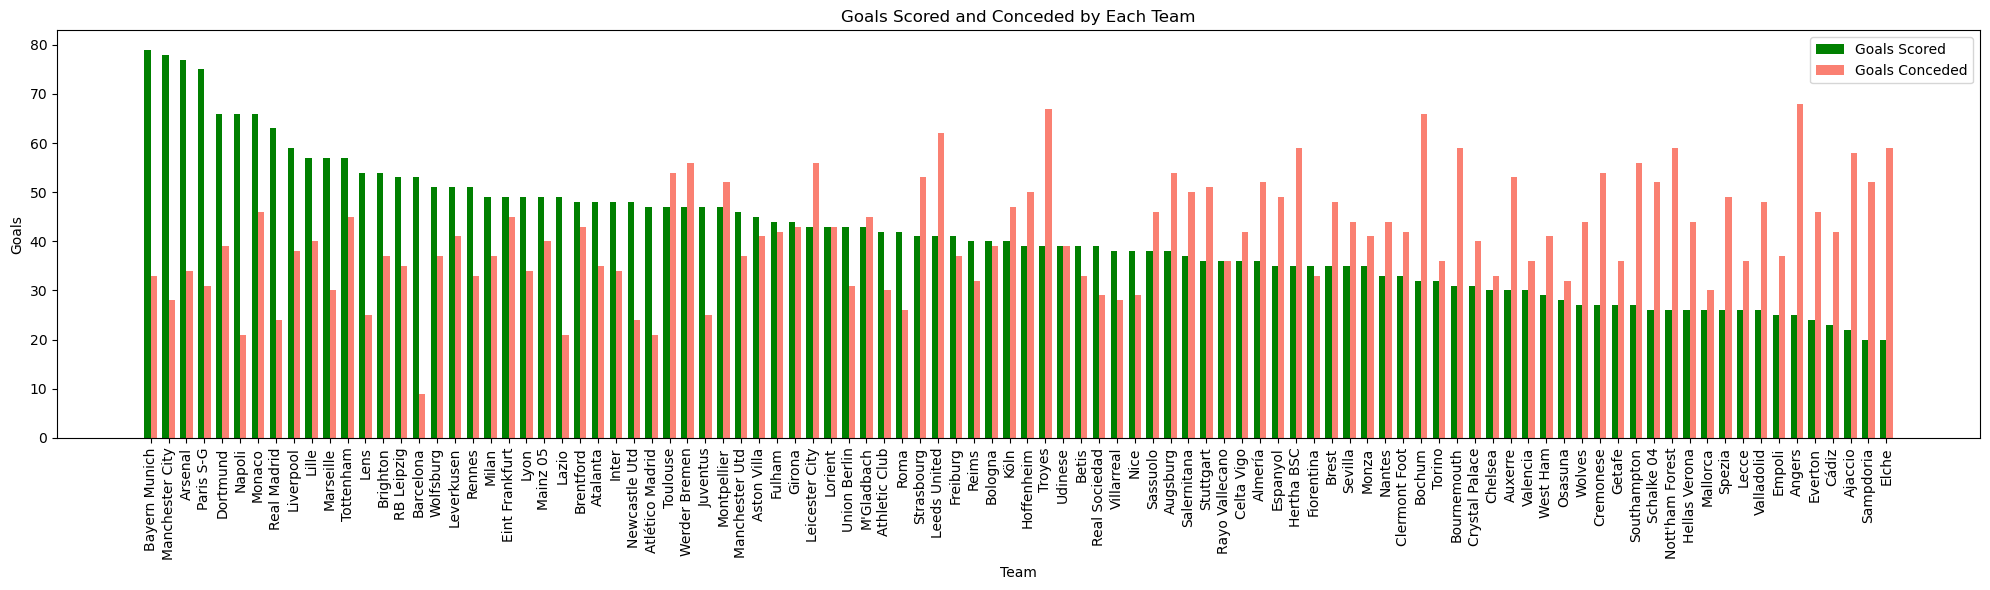

In [15]:
teamStatsDf_sorted = teamStatsDf.sort_values(by='GF', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 6))
index = np.arange(len(teamStatsDf_sorted['Squad'])) 
bar_width = 0.35

ax.bar(index, teamStatsDf_sorted['GF'], bar_width, label='Goals Scored', color='green')
ax.bar(index + bar_width, teamStatsDf_sorted['GA'], bar_width, label='Goals Conceded', color='salmon')

ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Goals Scored and Conceded by Each Team')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(teamStatsDf_sorted['Squad'], rotation=90) 
ax.legend()

plt.tight_layout()
plt.show()


#  2.2: what are the countries that have the most fans ? 

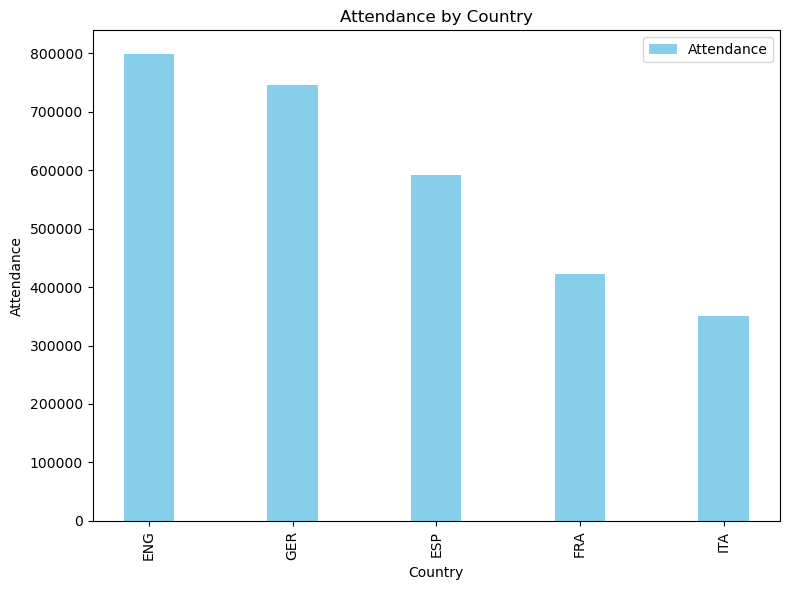

In [16]:
teamStatsDf_grouped = teamStatsDf.groupby('Country').sum().reset_index()
teamStatsDf_grouped_sorted = teamStatsDf_grouped.sort_values(by='Attendance', ascending=False).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(teamStatsDf_grouped_sorted['Country']))


ax.bar(index, teamStatsDf_grouped_sorted['Attendance'], bar_width, label='Attendance', color='skyblue')

ax.set_xlabel('Country')
ax.set_ylabel('Attendance')
ax.set_title('Attendance by Country')
ax.set_xticks(index)

ax.set_xticklabels(teamStatsDf_grouped_sorted['Country'], rotation=90)
ax.legend()


plt.tight_layout()
plt.show()


# 2.3 : what are the best teams in terms of league points ? 

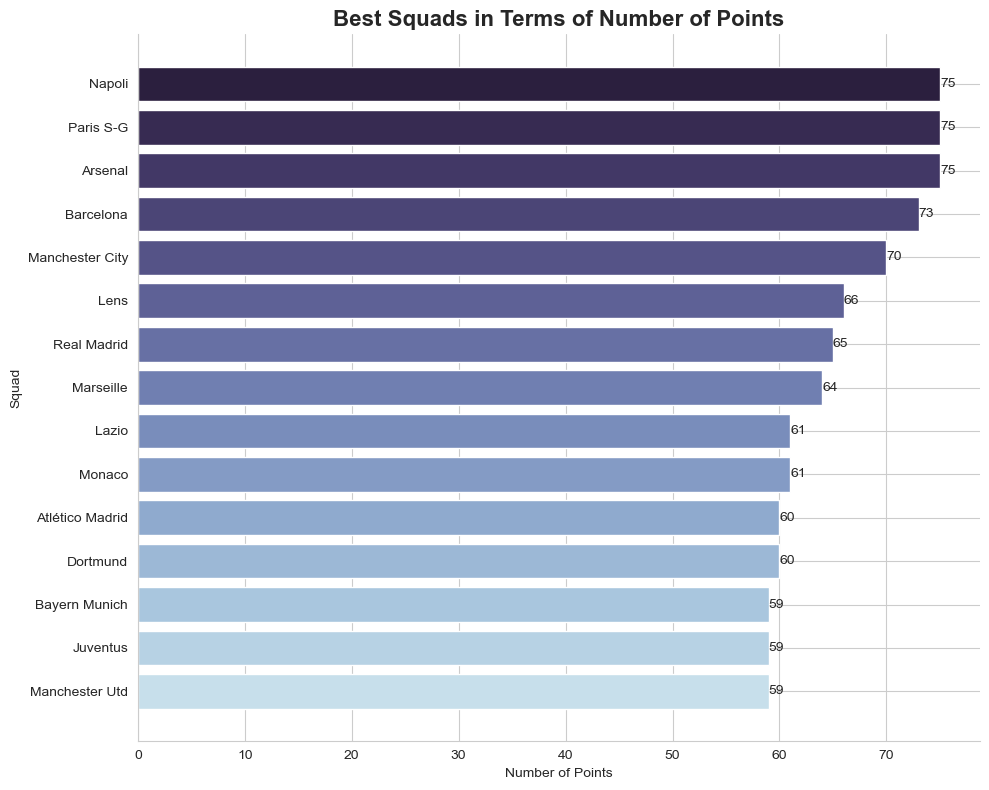

In [17]:
sns.set_style("whitegrid")

teamStatsDf_sorted = teamStatsDf.sort_values(by="Pts", ascending=True)

teamStatsDf_sorted= teamStatsDf_sorted.tail(15)

# Creating the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(teamStatsDf_sorted['Squad'], teamStatsDf_sorted['Pts'], color=sns.color_palette("ch:s=.25,rot=-.25", n_colors=15))

# Adding the data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}',
             va='center', ha='left')

# Adding titles and labels
plt.xlabel('Number of Points')
plt.ylabel('Squad')
plt.title('Best Squads in Terms of Number of Points', fontsize=16, fontweight='bold')

sns.despine()

plt.tight_layout()
plt.show()


# 2.4: what are the best teams in term of attendance ? 

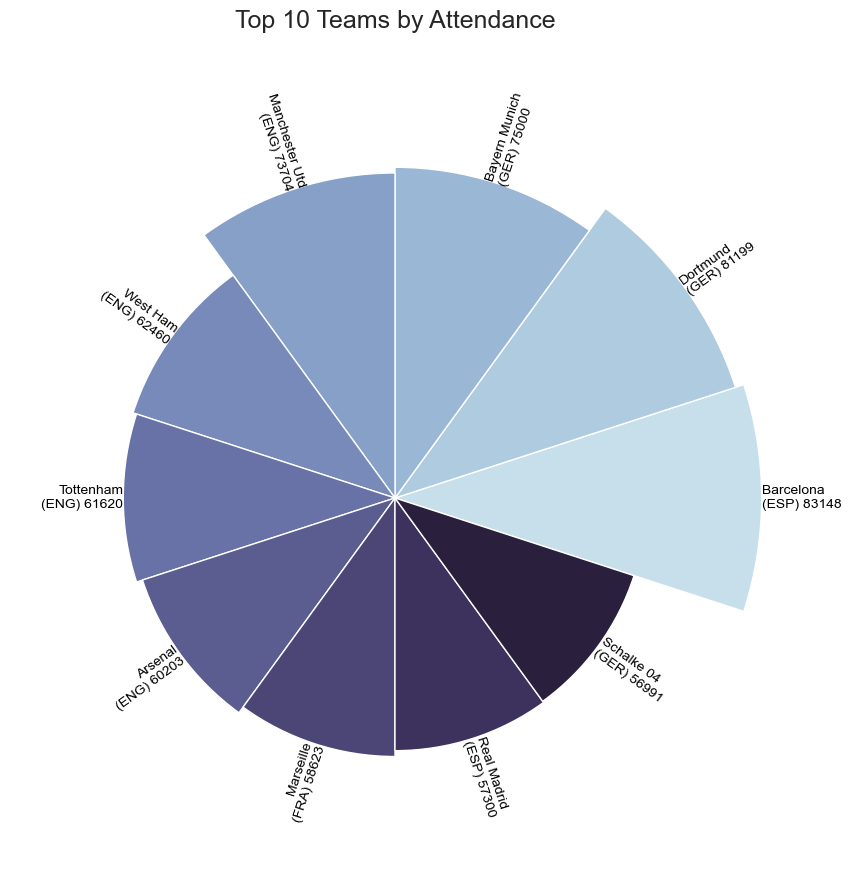

In [18]:
top_teams = teamStatsDf.nlargest(10, 'Attendance')
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.grid(False)
plt.axis("off")

fontlabels = {
    'family': 'Arial',
    'color': 'black',
    'size': '10',
}

heights = top_teams["Attendance"]
width = 2 * np.pi / len(top_teams)
angles = [element * width for element in range(len(top_teams))]
labels = [f'{row.Squad}\n({row.Country}) {row.Attendance}' for index, row in top_teams.iterrows()] 
colors = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)(np.linspace(0, 1, len(top_teams)))

bars = ax.bar(x=angles, height=heights, width=width, linewidth=1, edgecolor='white', color=colors)

labelpadding = 20
for bar, angle, label in zip(bars, angles, labels):
    rotation = np.rad2deg(angle)
    alignment = "right" if (angle > np.pi / 2) and (angle < 3 * np.pi / 2) else "left"
    rotation += 180 if alignment == "right" else 0
    ax.text(x=angle, y=bar.get_height() + labelpadding, s=label,
            ha=alignment, va='center', rotation=rotation, rotation_mode='anchor',
            fontdict=fontlabels)

ax.set_title("Top 10 Teams by Attendance", fontdict={'fontsize': 18, 'fontfamily': 'Arial'}, loc='center', y=1.1)
plt.show()


# 2.5: what are the leagues with the most goals ?

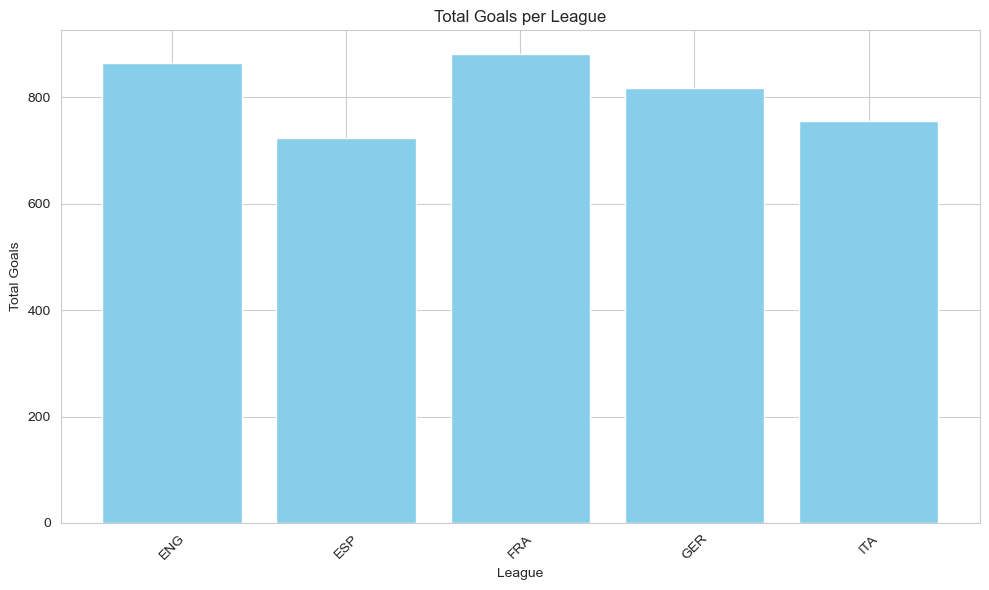

In [19]:
total_goals = teamStatsDf.groupby('Country')['GF'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(total_goals['Country'], total_goals['GF'], color='skyblue')
ax.set_xlabel('League')
ax.set_ylabel('Total Goals')
ax.set_title('Total Goals per League')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


# 2.6: what are the best team scorers per league ? 

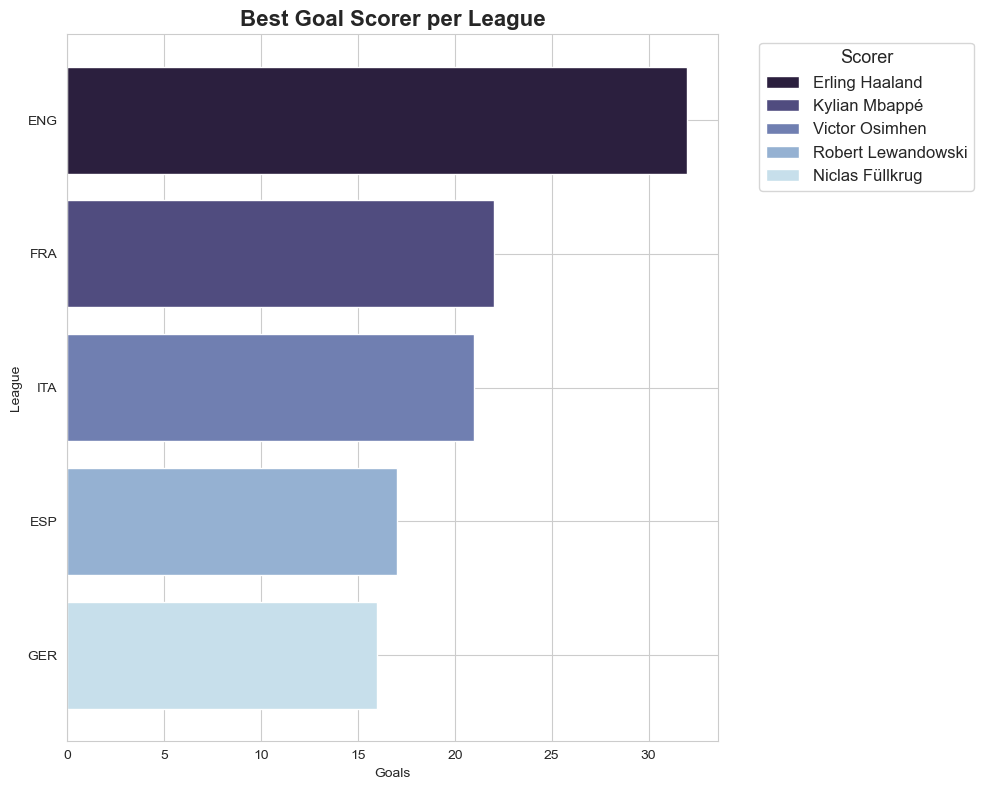

In [20]:
teamStatsDf[['Scorer', 'Goals']] = teamStatsDf['Top Team Scorer'].str.split(' - ', expand=True)
teamStatsDf['Goals'] = teamStatsDf['Goals'].astype(int)
best_scorers_per_league = teamStatsDf.loc[teamStatsDf.groupby('Country')['Goals'].idxmax()]
best_scorers_per_league = best_scorers_per_league.sort_values(by='Goals', ascending=True)


colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=5)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

for index, (i, row) in enumerate(best_scorers_per_league.iterrows()):
    plt.barh(row['Country'], row['Goals'], color=colors[index], label=row['Scorer'])

plt.xlabel('Goals')
plt.ylabel('League')
plt.title('Best Goal Scorer per League', fontsize=16, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles, labels, title='Scorer', title_fontsize='13', fontsize='12', loc='best', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


# 3 : now let's move on to the players dataset

lets first see how is our data partitioned : 

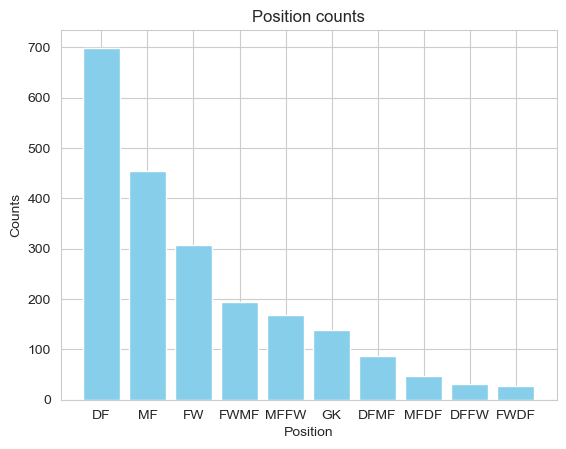

In [21]:
positions_counts = finalPlayerDf["Pos"].value_counts()
plt.bar(positions_counts.index, positions_counts.values,color='skyblue')
plt.title("Position counts")
plt.xlabel("Position")
plt.ylabel("Counts")
plt.show()

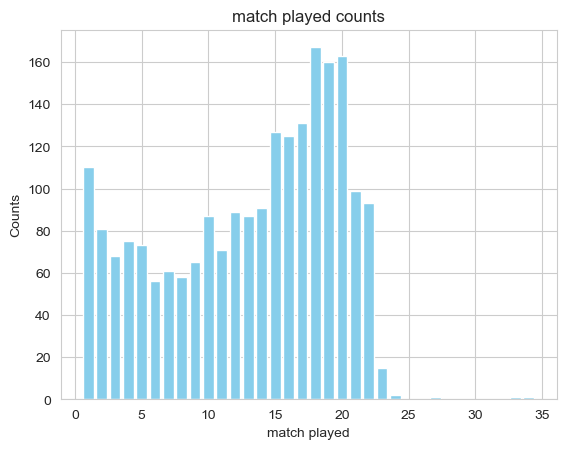

In [22]:
positions_counts = finalPlayerDf["MP"].value_counts()
plt.bar(positions_counts.index, positions_counts.values,color='skyblue')
plt.title("match played counts")
plt.xlabel("match played")
plt.ylabel("Counts")
plt.show()

# 3.1 who are the best driblers in the 2022-2023 season ? 

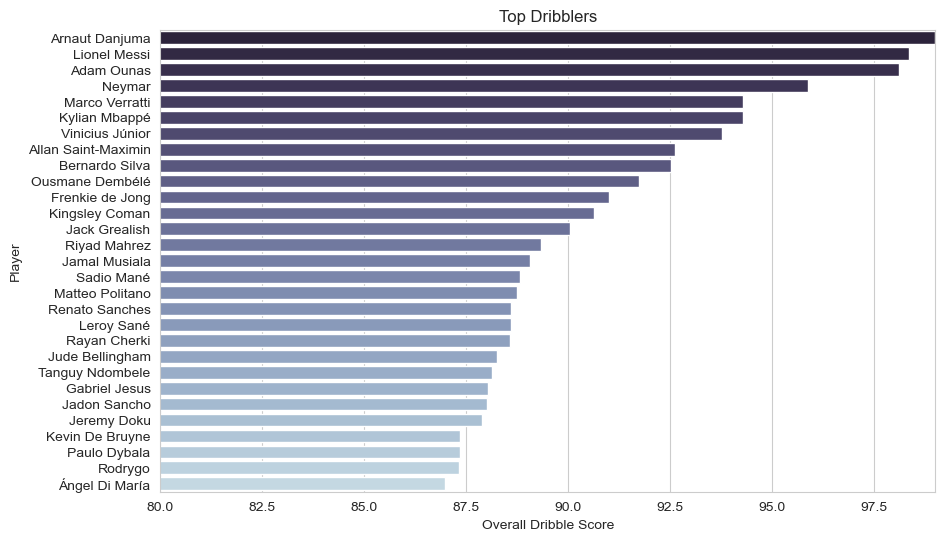

In [23]:
playerRadarDf['dribble_metric'] = playerRadarDf.apply(
    lambda row: (row['CarPrgDist'] + row['ToSuc'] + row['ScaDrib']+3*row["Dribbling Total_fifa"]+(1-row["TeamRank"])),
    axis=1
)

# map the dribble metric to 0-99 scale
playerRadarDf['dribble_metric'] = (playerRadarDf['dribble_metric'] - playerRadarDf['dribble_metric'].min()) / (playerRadarDf['dribble_metric'].max() - playerRadarDf['dribble_metric'].min()) * 60 + 39
 


top_dribblers_df = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'MF','FWMF','FW'])]

top_dribblers_df = top_dribblers_df.sort_values(by='dribble_metric', ascending=False)
colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_dribblers_df.head(30), x='dribble_metric', y='Player', palette=colors)

plt.title('Top Dribblers')
plt.xlabel('Overall Dribble Score')
plt.xlim(80,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()


# 3.2 : what is the country with the best dribblers ? 

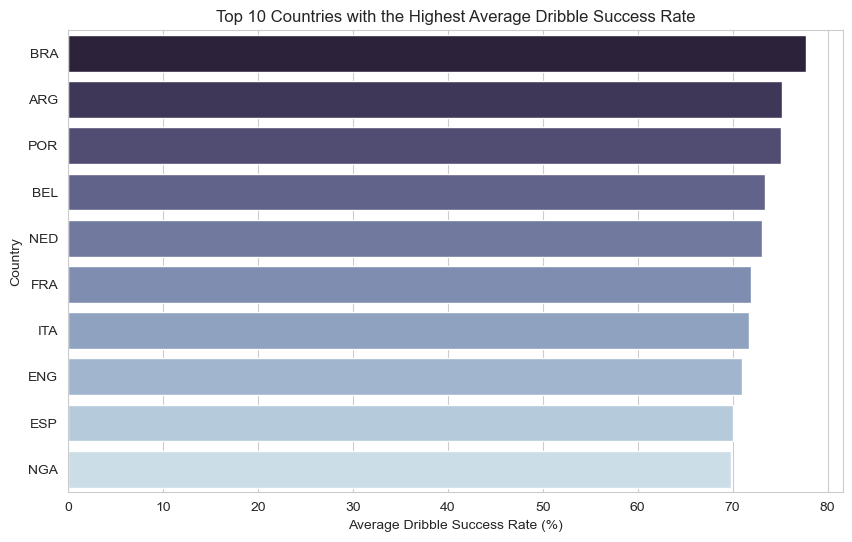

In [24]:
filtered_by_nation = top_dribblers_df.groupby('Nation').filter(lambda x: len(x) >= 15)

country_avg_dribble = filtered_by_nation.groupby('Nation')['dribble_metric'].mean().sort_values(ascending=False).head(10)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=10)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=country_avg_dribble.values, y=country_avg_dribble.index, palette=colors)

plt.title('Top 10 Countries with the Highest Average Dribble Success Rate')
plt.xlabel('Average Dribble Success Rate (%)')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.show()


# 3.3 : who are the best defensive players of the 2022-2023 season ? 

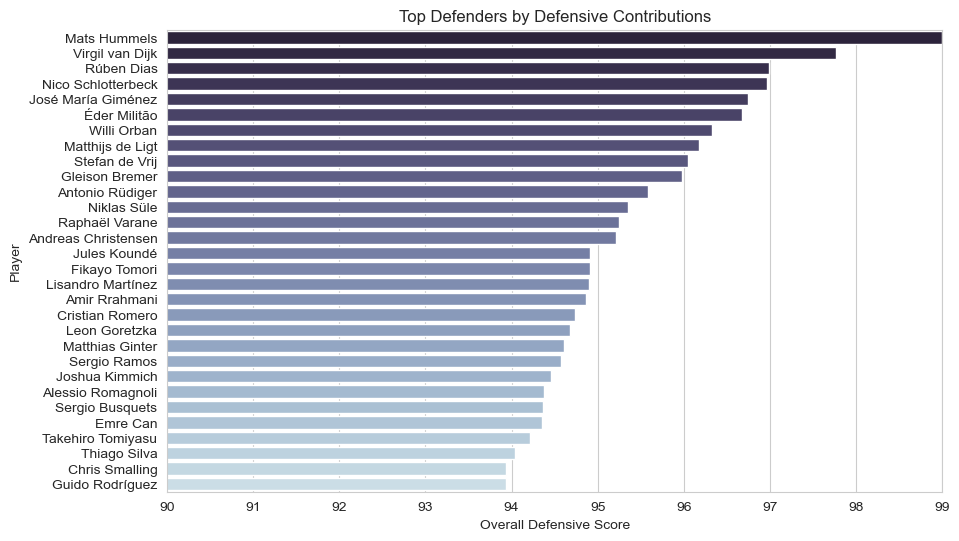

In [25]:
playerRadarDf['defensive_metric'] = playerRadarDf.apply(
    lambda row: (row['TklWon'] + row['Int'] + row['Clr'] + row['Blocks'] + row['Recov'] + row['AerWon'] - row['Fls']+ 5* row["Defending Total_fifa"]+(1-row["TeamRank"])) ,
    axis=1
)

# map the defensive metric to 0-99 scale
playerRadarDf['defensive_metric'] = (playerRadarDf['defensive_metric'] - playerRadarDf['defensive_metric'].min()) / (playerRadarDf['defensive_metric'].max() - playerRadarDf['defensive_metric'].min()) * 60 + 39

top_defenders_df = playerRadarDf[playerRadarDf['Pos'].isin(['MFDF', 'DF', 'MF'])]

top_defenders_df = top_defenders_df.sort_values(by='defensive_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_defenders_df.head(30), x='defensive_metric', y='Player', palette=colors)
plt.title('Top Defenders by Defensive Contributions')
plt.xlabel('Overall Defensive Score')
plt.xlim(90,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the most physical players of the 2022-2023 season ? 

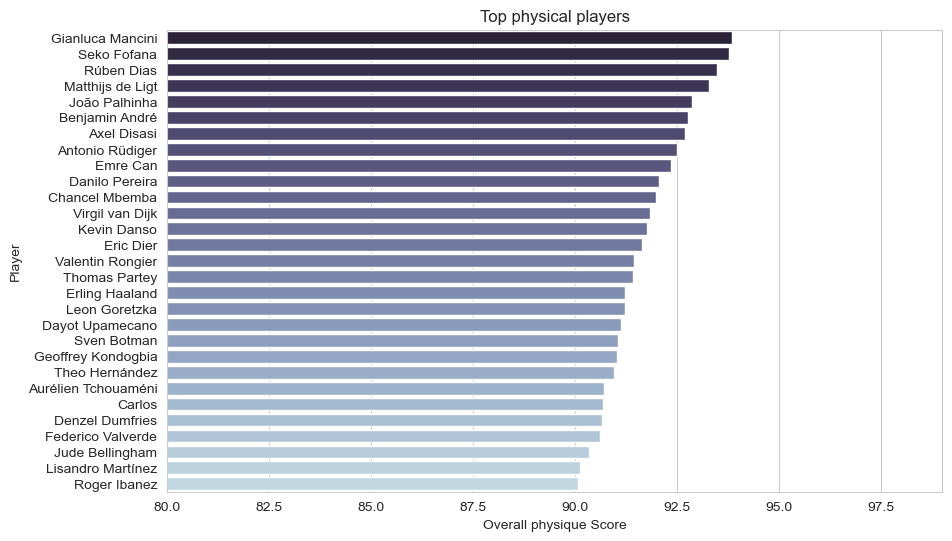

In [26]:
playerRadarDf['physical_metric'] = playerRadarDf.apply(
    lambda row: (row['TklWon'] + row['AerWon%'] + row['CarTotDist'] + row['Min'] + 4* row["Physicality Total_fifa"]+(1-row["TeamRank"])) ,
    axis=1
)

# map the physical metric to 0-99 scale
playerRadarDf['physical_metric'] = (playerRadarDf['physical_metric'] - playerRadarDf['physical_metric'].min()) / (playerRadarDf['physical_metric'].max() - playerRadarDf['physical_metric'].min()) * 60 + 39

top_physical_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_physical_df = top_physical_df.sort_values(by='physical_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_physical_df.head(30), x='physical_metric', y='Player', palette=colors)
plt.title('Top physical players')
plt.xlabel('Overall physique Score')
plt.xlim(80,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the players with the best passing in the 2022-2023 season ? 

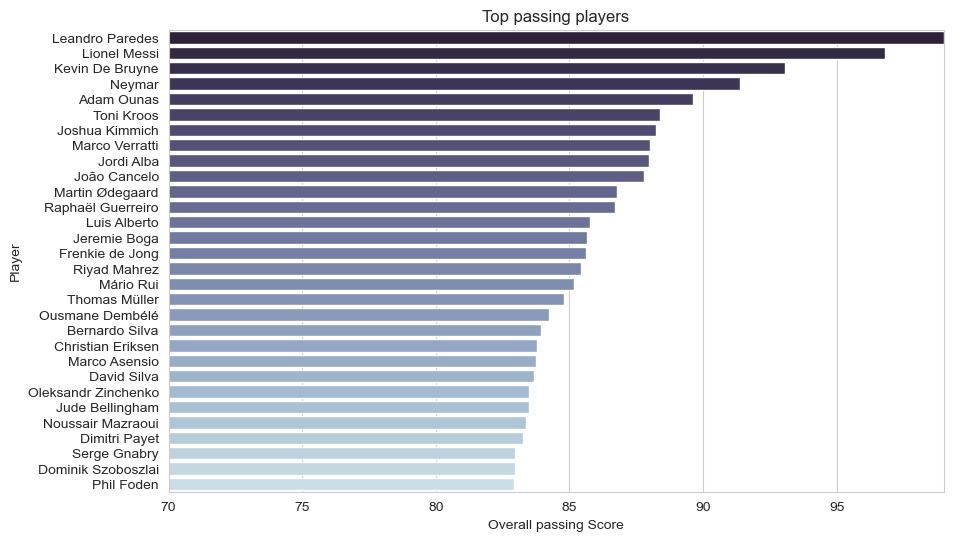

In [27]:
playerRadarDf['passing_metric'] = playerRadarDf.apply(
    lambda row: (2* row['Assists'] + row['PasTotCmp%'] + row['PPA'] + row['GCA'] + row['PasProg']+ row["Passing Total_fifa"]+(1-row["TeamRank"])) ,
    axis=1
)
# map the passing metric to 0-99 scale
playerRadarDf['passing_metric'] = (playerRadarDf['passing_metric'] - playerRadarDf['passing_metric'].min()) / (playerRadarDf['passing_metric'].max() - playerRadarDf['passing_metric'].min()) * 60 + 39

top_passing_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_passing_df = top_passing_df.sort_values(by='passing_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_passing_df.head(30), x='passing_metric', y='Player', palette=colors)
plt.title('Top passing players')
plt.xlabel('Overall passing Score')
plt.xlim(70,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the players with the best shooting in the 2022-2023 season ? 

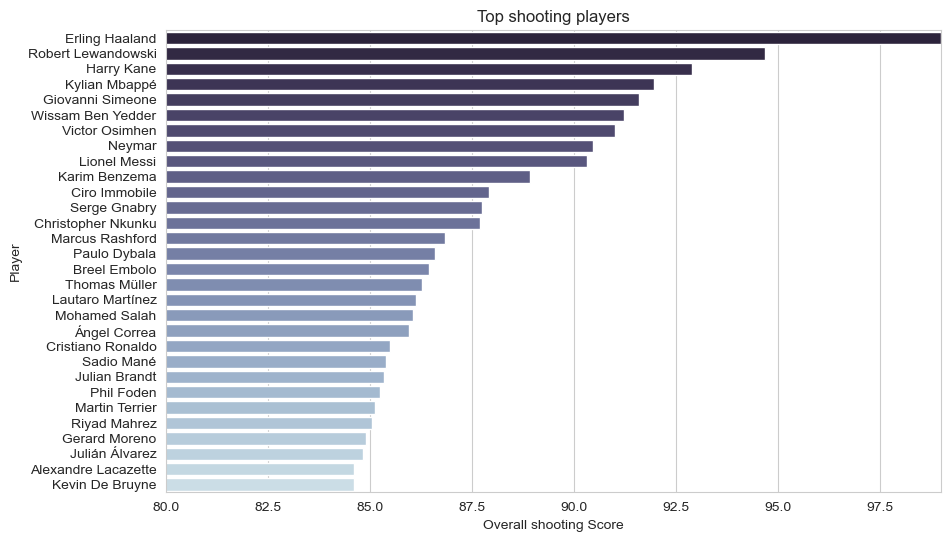

In [28]:
playerRadarDf['shooting_metric'] = playerRadarDf.apply(
    lambda row: (row['G/Sh'] + row['Goals'] + row['Shots'] + row['SoT%'] + row['G/SoT'] + 5 *row["Shooting Total_fifa"] + (1-row["TeamRank"])) ,
    axis=1
)
# map the shooting metric to 0-99 scale
playerRadarDf['shooting_metric'] = (playerRadarDf['shooting_metric'] - playerRadarDf['shooting_metric'].min()) / (playerRadarDf['shooting_metric'].max() - playerRadarDf['shooting_metric'].min()) * 60 + 39

top_shooting_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_shooting_df = top_shooting_df.sort_values(by='shooting_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_shooting_df.head(30), x='shooting_metric', y='Player', palette=colors)
plt.title('Top shooting players')
plt.xlabel('Overall shooting Score')
plt.xlim(80,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the players with the best pace in the 2022-2023 season ? 

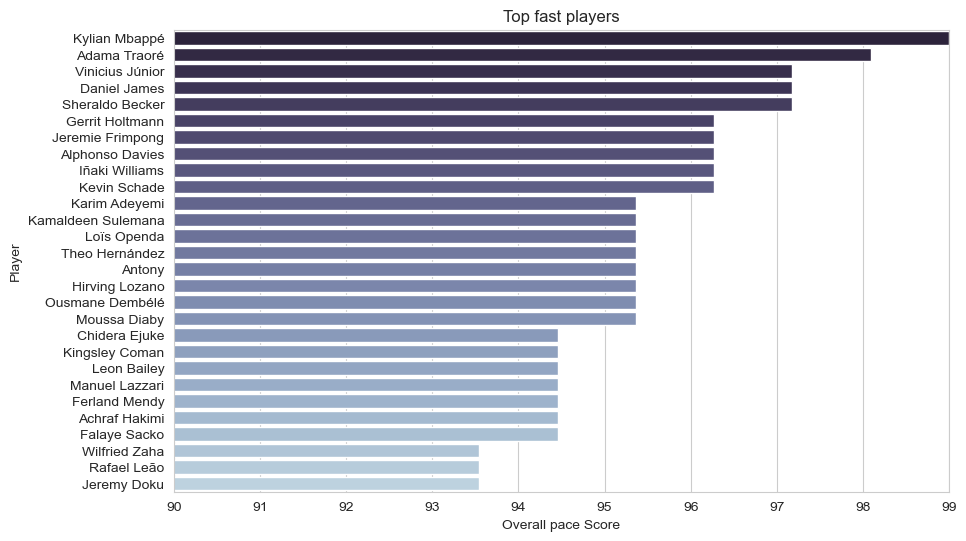

In [29]:
playerRadarDf['pace_metric'] = playerRadarDf.apply(
    lambda row: (row["Pace Total_fifa"]),  
    axis=1
)
# map the shooting metric to 0-99 scale
playerRadarDf['pace_metric'] = (playerRadarDf['pace_metric'] - playerRadarDf['pace_metric'].min()) / (playerRadarDf['pace_metric'].max() - playerRadarDf['pace_metric'].min()) * 60 + 39

top_pace_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_pace_df = top_pace_df.sort_values(by='pace_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pace_df.head(30), x='pace_metric', y='Player', palette=colors)
plt.title('Top fast players')
plt.xlabel('Overall pace Score')
plt.xlim(90,99)
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

In [30]:
# add a column for the overall score
playerRadarDf['overall_metric'] = playerRadarDf.apply(
    lambda row: (row['dribble_metric'] + row['defensive_metric'] + row['physical_metric'] + row['passing_metric'] + row['shooting_metric'] + row['pace_metric']) / 6,
    axis=1
)

# We will now try to get a photo for every player using beautiful soup and sofifa.com

In [31]:
def download_image(image_url, filename):
    # Ensure the full path for the file
    file_path = os.path.join('website/data/players_images', filename)

    # Get the image response
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
                time.sleep(0.1)

            return True

        #print(f"Image successfully downloaded to {file_path}")
    else:
        return False
        #print("Failed to download the image")

def setup_session():
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',  
        'Connection': 'keep-alive'
    }
    session.headers.update(headers)
    return session

def find_player_image(player_name):
    session = setup_session()
    base_url = 'https://sofifa.com'
    search_url = f'{base_url}/players'

    try:
        response = session.get(search_url, params={'keyword': player_name})
        if response.status_code != 200:
            #print("Failed to retrieve search page, status code:", response.status_code)
            return None

        soup = BeautifulSoup(response.text, 'html.parser')
        
        first_link = soup.find('article').find('table').find('tbody').find('tr').find('a', href=True)
        #print("First link found:", first_link['href'])
        if not first_link:
            #print("No links found in the first table row.")
            return None

        detail_page_url = base_url + first_link['href']
        detail_response = session.get(detail_page_url)
        detail_soup = BeautifulSoup(detail_response.text, 'html.parser')

        image_tag = detail_soup.find('article').find('img')
        #print("Image tag found:", image_tag)
        if image_tag and 'data-src' in image_tag.attrs:
            return image_tag['data-src']
        else:
            #print("No image found on the player detail page.")
            return None
    except Exception as e:
        #print("An error occurred:", str(e))
        return None


if not os.path.exists('website/data/players_images'):
    os.makedirs('website/data/players_images')  

for playerName in finalPlayerDf["Player"]:
    if not os.path.exists(f'website/data/players_images/{playerName}.png'):
        image_url = find_player_image(playerName)
        if image_url:
            filename = (f"{playerName}.png")
            if download_image(image_url, filename):
                print(f"Image for {playerName} saved successfully.")
        elif finalPlayerDf.loc[finalPlayerDf['Player'] == playerName, 'Image Link_fifa'].any():
            image_url = finalPlayerDf.loc[finalPlayerDf['Player'] == playerName, 'Image Link_fifa'].values[0]
            filename = f"{playerName}.png"
            if download_image(image_url, filename):
                print(f"Image for {playerName} saved from alternative link successfully.")
        else:
            print(f"Image for {playerName} could not be retrieved.")
    else:
        print(f"Image for {playerName} already exists.")



Image for Brenden Aaronson saved from alternative link successfully.
Image for Yunis Abdelhamid saved from alternative link successfully.
Image for Himad Abdelli saved from alternative link successfully.
Image for Salis Abdul Samed saved from alternative link successfully.
Image for Laurent Abergel saved from alternative link successfully.
Image for Oliver Abildgaard saved from alternative link successfully.
Image for Zakaria Aboukhlal saved from alternative link successfully.
Image for Tammy Abraham saved from alternative link successfully.
Image for Francesco Acerbi saved from alternative link successfully.
Image for Mohamed Achi saved from alternative link successfully.
Image for Marcos Acuña saved from alternative link successfully.
Image for Che Adams saved from alternative link successfully.
Image for Tyler Adams saved from alternative link successfully.
Image for Sargis Adamyan saved from alternative link successfully.
Image for Tosin Adarabioyo saved from alternative link succe

KeyboardInterrupt: 

# we will now download all the flags for every player

In [38]:


# Create the 'flags' directory if it doesn't exist
if not os.path.exists('website/data/flags'):
    os.makedirs('website/data/flags')

def download_image(image_url, path):
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(path, 'wb') as f:
                response.raw.decode_content = True
                shutil.copyfileobj(response.raw, f)
            return True
    except Exception as e:
        print(f"Error downloading {image_url}: {e}")
    return False

# Iterate over unique nations in the dataframe
for nation in finalPlayerDf['Nationality_fifa'].unique():
    flag_path = f'website/data/flags/{nation}.png'
    if not os.path.exists(flag_path):
        # Get the image URL from the dataframe
        image_url = finalPlayerDf.loc[finalPlayerDf['Nationality_fifa'] == nation, 'National Team Image Link_fifa'].values[0]
        if image_url != "-":
            if download_image(image_url, flag_path):
                print(f"Image for {nation} saved successfully.")
            else:
                print(f"Failed to download image for {nation}.")
        else:
            print(f"No image URL provided for {nation}. Searching on Google Images...")
            # Perform Google search
            if nation == 'GAM':
                nation = 'Gambia'
            if nation == 'ANG':
                nation = 'Angola'
            if nation == 'CTA':
                nation = 'central african republic'

            search_url = f"https://www.google.com/search?q={nation}+nation+flag&source=lnms&tbm=isch"
            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
            response = requests.get(search_url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            images = soup.find_all('img')
            for img in images:
                img_url = img.get('src')
                if img_url and img_url.startswith('http'):
                    if download_image(img_url, flag_path):
                        print(f"Image for {nation} saved successfully from Google.")
                        break
                else:
                    print(f"Invalid image URL for {nation}. Continuing search...")
            else:
                print(f"No valid images found for {nation}.")
    else:
        print(f"Image for {nation} already exists.")


Image for United States saved successfully.
Image for Morocco saved successfully.
Image for France saved successfully.
Image for Ghana saved successfully.
Image for Denmark saved successfully.
Image for England saved successfully.
Image for Italy saved successfully.
Image for Argentina saved successfully.
Image for Scotland saved successfully.
No image URL provided for Armenia. Searching on Google Images...
Invalid image URL for Armenia. Continuing search...
Image for Armenia saved successfully from Google.
Image for Germany saved successfully.
Image for Switzerland saved successfully.
No image URL provided for Côte d'Ivoire. Searching on Google Images...
Invalid image URL for Côte d'Ivoire. Continuing search...
Image for Côte d'Ivoire saved successfully from Google.
Image for Spain saved successfully.
Image for Colombia saved successfully.
Image for Sweden saved successfully.
No image URL provided for Nigeria. Searching on Google Images...
Invalid image URL for Nigeria. Continuing sea

# we will now scrap all the club logos

In [ ]:
if not os.path.exists('website/data/club_logos'):
    os.makedirs('website/data/club_logos')

# Temporary list to hold the first club from each player's list of clubs or single club
first_clubs = []
for clubs in finalPlayerDf['Squad']:
    if isinstance(clubs, list):
        # Add only the first club if it's a list
        first_clubs.append(clubs[0])
    else:
        # Add the club if it's not a list
        first_clubs.append(clubs)

# Iterate over unique first clubs
for club in set(first_clubs):
    logo_path = f'website/data/club_logos/{club}.png'
    if not os.path.exists(logo_path):
        print(f"No logo URL provided for {club}. Searching on Google Images...")
        # Perform Google search for PNG logos with a transparent background
        search_url = f"https://www.google.com/search?q={club}+football+club+logo+filetype:png+transparent+background&tbm=isch"
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(search_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        images = soup.find_all('img')
        for img in images:
            img_url = img.get('src')
            if img_url and img_url.startswith('http'):
                if download_image(img_url, logo_path):
                    print(f"Logo for {club} saved successfully from Google.")
                    break
            else:
                print(f"Invalid image URL for {club}. Continuing search...")
        else:
            print(f"No valid logos found for {club}.")
    else:
        print(f"Logo for {club} already exists.")


Logo for Montpellier already exists.
Logo for Sevilla already exists.
Logo for Cremonese already exists.
Logo for Salernitana already exists.
Logo for Liverpool already exists.
Logo for Tottenham already exists.
Logo for Newcastle Utd already exists.
Logo for Hoffenheim already exists.
Logo for Elche already exists.
Logo for Sassuolo already exists.
Logo for Bournemouth already exists.
Logo for Napoli already exists.
Logo for Milan already exists.
Logo for Manchester City already exists.
Logo for Atlético Madrid already exists.
Logo for Villarreal already exists.
Logo for Southampton already exists.
Logo for Espanyol already exists.
Logo for Everton already exists.
Logo for Chelsea already exists.
Logo for Crystal Palace already exists.
Logo for Angers already exists.
Logo for Eint Frankfurt already exists.
Logo for Lyon already exists.
Logo for Leeds United already exists.
Logo for Valencia already exists.
Logo for Roma already exists.
Logo for Lille already exists.
Logo for Nantes al

In [ ]:
# set the display options to max columns
pd.set_option('display.max_seq_items', None)
print(playerRadarDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Player', 'Pos', 'Comp', 'Nation', 'Image Link_fifa',
       'Best Position_fifa', 'National Team Image Link_fifa', 'Squad',
       ' GoalkeeperKicking_fifa', 'Acceleration_fifa', 'AerLost', 'AerWon',
       'AerWon%', 'Assists', 'BlkSh', 'Blocks', 'CPA', 'Car3rd', 'CarDis',
       'CarMis', 'CarPrgDist', 'CarTotDist', 'Carries', 'Clr', 'CrdR', 'CrdY',
       'Crossing_fifa', 'Crs', 'Defending Total_fifa', 'Dribbling Total_fifa',
       'Dribbling_fifa', 'Finishing_fifa', 'Fld', 'Fls', 'G/Sh', 'G/SoT',
       'GCA', 'GcaDrib', 'GcaFld', 'GcaPassDead', 'GcaPassLive', 'GcaSh',
       'Goalkeeper Diving_fifa', 'Goalkeeper Handling_fifa',
       'Goalkeeper Positioning_fifa', 'Goalkeeper Reflexes_fifa', 'Goals',
       'Heading Accuracy_fifa', 'Height(in cm)_fifa', 'Int', 'MP', 'Min',
       'Off', 'PKwon', 'PPA', 'Pace Total_fifa', 'Pas3rd', 'PasAss',
       'PasBlocks', 'PasCmp', 'PasOff', 'PasProg', 'PasTotCmp', 'PasTotCmp%',
       'PasTotDist', 'PasTotPrgDist', 'Passing Total_f

In [32]:
# set the display options to max columns
pd.set_option('display.max_seq_items', None)
print(finalPlayerDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw',
       'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff',
       'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh',
       'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib',
       'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks',
       'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches',
       'TouD

In [33]:
# concat the columns pace_metric,shooting_metric,passing_metric,physical_metric,defensive_metric,dribble_metric to finalPlayerDf
finalPlayerDf = pd.concat([finalPlayerDf, playerRadarDf[['pace_metric','shooting_metric','passing_metric','physical_metric','defensive_metric','dribble_metric','overall_metric']]], axis=1)

In [34]:
# save the finalPlayerDf to json
finalPlayerDf.to_json('website/data/finalPlayerDf.json', orient='records')
#save the teamStatsDf to json
teamStatsDf.to_json('website/data/teamStatsDf.json', orient='records')

In [55]:
import json
# create a df with the number of players per country from finalPlayerDf with groupby and count
players_per_country = finalPlayerDf.groupby('Nationality_fifa').size().reset_index(name='Counts')
# save the players_per_country to json
players_per_country.to_json('docs/data/players_per_country.json', orient='records')

# read the coordinates of the countries from the json file into a df
with open('docs/data/countries_coords.json') as f:
    countries_coordinates = json.load(f)
countries_coordinates_df = pd.DataFrame(countries_coordinates)

# invert the columns and rows of the countries_coordinates_df
countries_coordinates_df = countries_coordinates_df.transpose()

# make the index a row named 'Country'
countries_coordinates_df = countries_coordinates_df.reset_index()
countries_coordinates_df = countries_coordinates_df.rename(columns={'index': 'Country'})

countries_coordinates_df

# merge the players_per_country with the countries_coordinates_df
players_per_country = players_per_country.merge(countries_coordinates_df, left_on='Nationality_fifa', right_on='Country', how='left')

players_per_country.drop(columns=['Country'], inplace=True)

players_per_country

,Nationality_fifa,Counts,lat,lon
0,Albania,11,41.1533,20.1683
1,Algeria,16,28.0339,1.6596
2,Angola,2,-11.2027,17.8739
3,Argentina,74,-38.4161,-63.6167
4,Armenia,2,40.0691,45.0382
...,...,...,...,...
92,Uzbekistan,1,41.3775,64.5853
93,Venezuela,3,6.4238,-66.5897
94,Wales,15,52.1307,-3.7837
95,Zambia,3,-13.1339,27.8493


In [68]:
import folium
import math

# Create a folium map centered around the world
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Define a function to determine the radius based on the number of players
def calculate_radius(count):
    # use a logarithmic scale to calculate the radius
    return math.log(count + 1) *3

# Add circle markers to the map
for index, row in players_per_country.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=calculate_radius(row['Counts']),
        popup=f"{row['Nationality_fifa']}: {row['Counts']} players",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(world_map)

world_map


In [69]:
# save the html file
world_map.save('docs/playersWorld_map.html')